# Class Imbalance Correction Techniques

✅ Step-by-Step Plan:

1. Generate Imbalanced Dataset
We’ll simulate a binary classification problem with imbalance (e.g., 90% class 0, 10% class 1).

2. Visualize the Imbalance
3. Apply All Major Correction Methods
We'll cover:

**Resampling Techniques:**


a) Random Undersampling

b) Random Oversampling

c) SMOTE (Synthetic Minority Oversampling Technique)

d) ADASYN (Adaptive Synthetic Sampling)

e) SMOTE + Tomek Links

f) SMOTEENN (SMOTE + Edited Nearest Neighbors)

**Algorithm-Level Techniques:**

g) Class Weights in Models (e.g., Logistic Regression)

## Generating Imbalanced Dataset



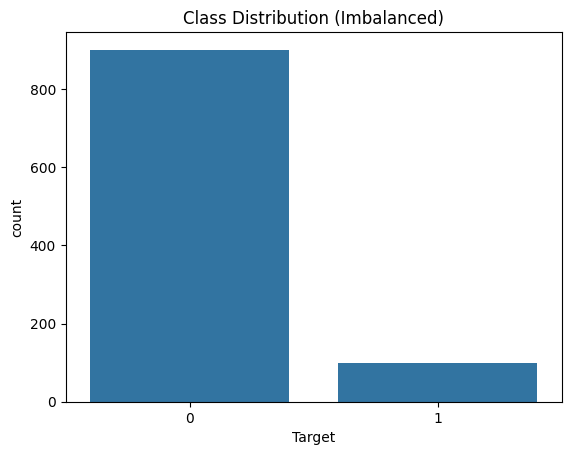

Original class distribution: Counter({np.int64(0): 900, np.int64(1): 100})


In [11]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Create Imbalanced Data
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1], n_informative=3,
                           n_redundant=1, flip_y=0, n_features=5,
                           n_clusters_per_class=1, n_samples=1000, random_state=42)

# Convert to DataFrame
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 6)])
df['Target'] = y

# Step 3: Visualize Imbalance
sns.countplot(x='Target', data=df)
plt.title("Class Distribution (Imbalanced)")
plt.show()

print("Original class distribution:", Counter(y))


In [21]:
df.head()



,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,1.021519,-0.548166,-2.079610,2.988799,-2.282637,0
1,0.210297,0.378811,-1.558116,1.737750,-2.083806,0
2,0.312219,0.266673,-0.873507,2.422799,-2.373239,0
3,0.613577,-0.487993,-1.824985,2.346751,-2.172025,0
4,-0.062001,-0.837709,-1.414938,1.124668,-1.826684,0


In [13]:
df.tail()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
995,0.141158,1.410214,-2.320817,0.749351,-1.453040,0
996,0.580855,0.286195,-2.667136,1.670716,-1.840654,0
997,0.769980,-1.460925,-3.103829,1.648837,-1.679590,0
998,1.133483,0.553364,-3.761090,1.939160,-1.648539,0
999,0.457990,-2.664332,-0.959610,2.629161,-2.386679,0


In [14]:
# Apply All Imbalance Correction Methods
# a) Random Oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
print("After Random Oversampling:", Counter(y_ros))


After Random Oversampling: Counter({np.int64(0): 900, np.int64(1): 900})


In [15]:
df.head(10)

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,1.021519,-0.548166,-2.079610,2.988799,-2.282637,0
1,0.210297,0.378811,-1.558116,1.737750,-2.083806,0
2,0.312219,0.266673,-0.873507,2.422799,-2.373239,0
3,0.613577,-0.487993,-1.824985,2.346751,-2.172025,0
4,-0.062001,-0.837709,-1.414938,1.124668,-1.826684,0
5,0.862149,0.085079,-2.454704,2.272063,-1.933653,0
6,0.415090,-1.621394,-2.872237,1.093118,-1.582444,0
7,0.592106,0.033901,-2.756969,1.558259,-1.739071,0
8,0.490462,0.595702,-2.540451,1.416147,-1.671187,0
9,-0.095249,0.200015,-0.000571,2.168574,-2.430222,0


In [16]:
# b) Random Undersampling

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
print("After Random Undersampling:", Counter(y_rus))


After Random Undersampling: Counter({np.int64(0): 100, np.int64(1): 100})


In [19]:
df.tail(10)

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
990,0.467894,-0.182418,-1.180922,2.572347,-2.396405,0
991,-0.361868,0.356217,1.962662,2.140815,-2.075767,1
992,-0.797903,0.819888,1.762355,2.223852,-2.947115,1
993,0.603377,0.608408,-1.748944,2.385412,-2.199787,0
994,-0.717540,-0.251581,2.395019,3.341691,-3.745689,1
995,0.141158,1.410214,-2.320817,0.749351,-1.453040,0
996,0.580855,0.286195,-2.667136,1.670716,-1.840654,0
997,0.769980,-1.460925,-3.103829,1.648837,-1.679590,0
998,1.133483,0.553364,-3.761090,1.939160,-1.648539,0
999,0.457990,-2.664332,-0.959610,2.629161,-2.386679,0


In [22]:
# c) SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)
print("After SMOTE:", Counter(y_sm))



After SMOTE: Counter({np.int64(0): 900, np.int64(1): 900})


In [24]:
df.tail()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
995,0.141158,1.410214,-2.320817,0.749351,-1.453040,0
996,0.580855,0.286195,-2.667136,1.670716,-1.840654,0
997,0.769980,-1.460925,-3.103829,1.648837,-1.679590,0
998,1.133483,0.553364,-3.761090,1.939160,-1.648539,0
999,0.457990,-2.664332,-0.959610,2.629161,-2.386679,0


In [25]:
#  d) ADASYN

from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_ada, y_ada = adasyn.fit_resample(X, y)
print("After ADASYN:", Counter(y_ada))


After ADASYN: Counter({np.int64(0): 900, np.int64(1): 900})


In [26]:
df.tail()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
995,0.141158,1.410214,-2.320817,0.749351,-1.453040,0
996,0.580855,0.286195,-2.667136,1.670716,-1.840654,0
997,0.769980,-1.460925,-3.103829,1.648837,-1.679590,0
998,1.133483,0.553364,-3.761090,1.939160,-1.648539,0
999,0.457990,-2.664332,-0.959610,2.629161,-2.386679,0


In [27]:
# e) SMOTE + Tomek Links

from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_smt, y_smt = smote_tomek.fit_resample(X, y)
print("After SMOTE + Tomek Links:", Counter(y_smt))


After SMOTE + Tomek Links: Counter({np.int64(0): 900, np.int64(1): 900})


In [28]:
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,1.021519,-0.548166,-2.079610,2.988799,-2.282637,0
1,0.210297,0.378811,-1.558116,1.737750,-2.083806,0
2,0.312219,0.266673,-0.873507,2.422799,-2.373239,0
3,0.613577,-0.487993,-1.824985,2.346751,-2.172025,0
4,-0.062001,-0.837709,-1.414938,1.124668,-1.826684,0


In [29]:
# f) SMOTE + ENN (SMOTEENN)

from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_smenn, y_smenn = smote_enn.fit_resample(X, y)
print("After SMOTEENN:", Counter(y_smenn))


After SMOTEENN: Counter({np.int64(1): 900, np.int64(0): 899})


In [31]:
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,1.021519,-0.548166,-2.079610,2.988799,-2.282637,0
1,0.210297,0.378811,-1.558116,1.737750,-2.083806,0
2,0.312219,0.266673,-0.873507,2.422799,-2.373239,0
3,0.613577,-0.487993,-1.824985,2.346751,-2.172025,0
4,-0.062001,-0.837709,-1.414938,1.124668,-1.826684,0


In [33]:
# g) Algorithm-Level: Class Weights
# Using class weights with Logistic Regression:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply class_weight='balanced'
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report with Class Weights:")
print(classification_report(y_test, y_pred))


Classification Report with Class Weights:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       180
           1       0.95      1.00      0.98        20

    accuracy                           0.99       200
   macro avg       0.98      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



# Summary of Techniques Used:

| Technique                | Handles Imbalance by                                   |
| ------------------------ | ------------------------------------------------------ |
| **Random Oversampling**  | Duplicating minority class                             |
| **Random Undersampling** | Removing majority class samples                        |
| **SMOTE**                | Creating synthetic samples                             |
| **ADASYN**               | Adaptive synthetic generation (more on harder samples) |
| **SMOTE + Tomek**        | SMOTE + cleaning overlapping classes                   |
| **SMOTEENN**             | SMOTE + noise removal using ENN                        |
| **Class Weights**        | Model penalizes misclassification of minority class    |
